In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [7]:
with open(r"C:\Users\Windows11\Desktop\ML_data\ML4Liquidity\corr_mat_rela.pkl", 'rb') as f:
    corr_mat_spread = pickle.load(f)

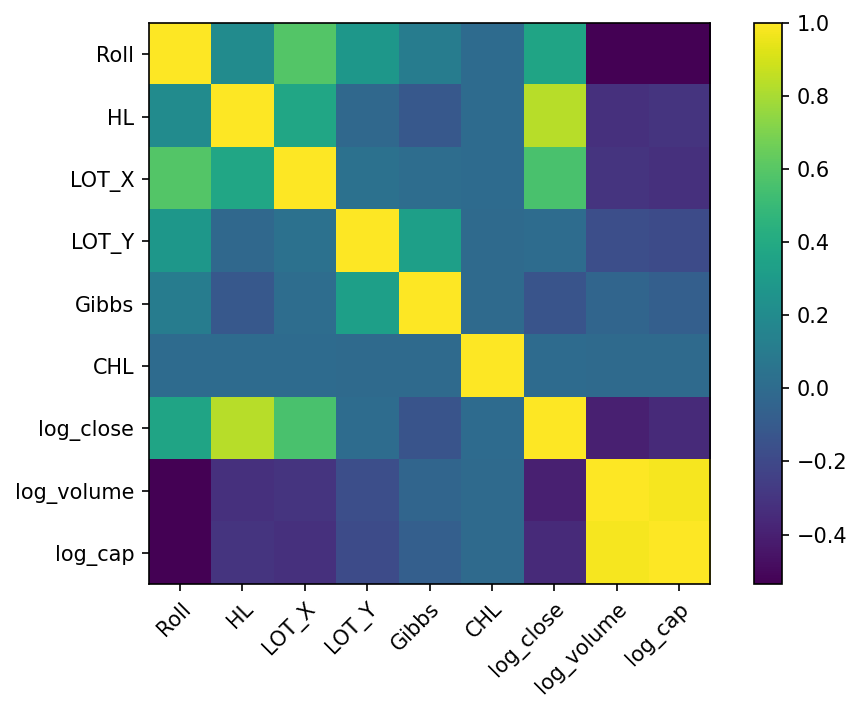

In [8]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL', 'log_close', 'log_volume', 'log_cap'])

plt.figure(dpi=150)
plt.xticks(np.arange(len(fea_names)), labels=fea_names, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(fea_names)), labels=fea_names)    


plt.imshow(corr_mat_spread)
plt.tight_layout()
plt.colorbar()
plt.show()
